In [32]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

archive = 'ucr'
dataset_name = 'GunPoint'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
dataset = 'GunPoint'
model_type ='resnet'
ylen = 1
x_train,y_train,x_test,y_test = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]

x_train,y_train_2,x_test,y_test_2  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]
dataset = 'GunPoint'
itr = 0
#./results/ucr/Beef/experiment_2/resnet/resnet_mt_ae_0.25/resnet_ig_trf/best_model.hdf5
#results\ucr\Beef\experiment_2\resnet\resnet_mt_ae_0.25_0\resnet_ig_trf\df_best_model.csv
ig_link = f'./results/ucr/{dataset}/experiment_1/resnet/resnet_mt_ae_{itr}/resnet_ig_norm/best_model.hdf5'
#f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_ae_0.25_{itr}/resnet_ig_raw/best_model.hdf5'
ig_model = keras.models.load_model(ig_link ,compile=False)

(array([[-0.64789, -0.64199, -0.63819, ..., -0.64043, -0.63867, -0.63866],
        [-0.64443, -0.6454 , -0.64706, ..., -0.63493, -0.6345 , -0.6316 ],
        [-0.77835, -0.77828, -0.77715, ..., -0.7042 , -0.70761, -0.70712],
        ...,
        [-0.77913, -0.77838, -0.77574, ..., -0.50501, -0.50373, -0.50438],
        [-0.70303, -0.70262, -0.7025 , ..., -0.64113, -0.64141, -0.64211],
        [-1.4357 , -1.4323 , -1.4329 , ..., -1.4355 , -1.4353 , -1.4309 ]]),
 array([[ 1.08764051e-02,  1.52248358e-02,  1.58372968e-02, ...,
         -8.85246042e-03, -1.10927822e-05,  5.13115153e-03],
        [ 1.26404287e-02,  1.65711828e-02,  1.55649399e-02, ...,
         -9.62457806e-03, -4.82629366e-05,  5.84629085e-03],
        [-1.57932527e-02, -2.13289782e-02, -2.12799925e-02, ...,
          1.74310505e-02,  8.70372914e-03, -7.84354343e-04],
        ...,
        [ 1.40985195e-02,  1.54294362e-02,  1.07484600e-02, ...,
         -1.08138798e-02, -3.74114420e-03,  2.03947863e-03],
        [-2.125393

### LERF 


In [29]:
%matplotlib inline


for ts in range(len(ig_data_stl[1])): 
    train_att = ig_data_stl[1] 
    sorted_vals = np.argsort(train_att[ts])
    xvals = ig_data_stl[1][ts]
    ytrue  = data[1][ts]

    pred_label = np.argmax(ig_model.predict(ig_data_stl[])[0][ts])
    #print(xvals)
    sup_array = []
    if pred_label == 0:
        for idx in range(0, len(sorted_vals), 1):
            sup_x  = xvals.copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals[:idx]] = 0
            sup_array.append(sup_x)
            #sup_x[sorted_vals[:idx]] = np.nan 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            #sup_array.append(interpolated_array)


        sup_array = np.array(sup_array)
        pred = ig_model.predict(sup_array)
        plt.plot(pred[0][:,pred_label])
plt.show()
plt.draw()



2/2 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

### Add most relevant to baseline

150
[1.]
2/2 [==============================] - 0s 35ms/step
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.8269, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.8269, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.89001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

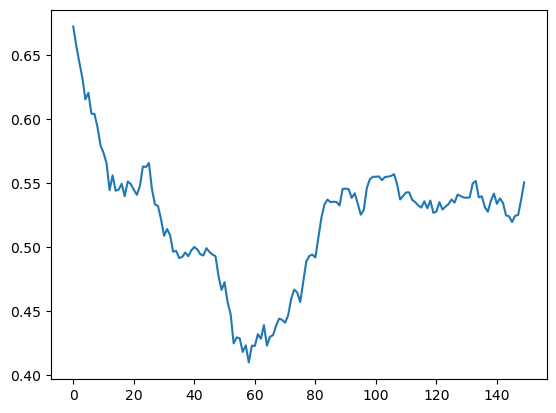

In [69]:
%matplotlib inline


#for ts in range(len(ig_data_stl[1])): 

ts =12
train_att = y_train_2
sorted_vals = np.argsort(train_att[ts])
print(len(sorted_vals))
xvals = x_train
ytrue  = y_train[ts]

print(ytrue)

pred_label = np.argmax(ig_model.predict(xvals)[0][ts])
#print(xvals)
pred_acc_per_ts = [] 
sup_array = []
baseline = [0]*150
if True:#pred_label == 0:
    #np.array(baseline.copy())
    sup_x = baseline
    for idx in range(0, len(sorted_vals), 1):
        #sup_x  = xvals[ts].copy()
        #print(sorted_vals[:idx])
        #print(sorted_vals[:idx])
        #sup_x[sorted_vals[:idx]] = 0

        sup_x[sorted_vals[idx]] = xvals[ts][sorted_vals[idx]]
        sup_array.append(sup_x.copy())

        


        #sup_x[sorted_vals[:idx]] = np.nan 
        # Indices of non-NaN values
        #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
        # Linearly interpolate NaN values
        #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
        #sup_array.append(interpolated_array)


    print(sup_array)
    sup_array = np.array(sup_array)
    pred = ig_model.predict(sup_array)
    pred_acc_per_ts.append(pred[0][:,pred_label])
#print(pred_acc_per_ts)
print(pred_acc_per_ts)
plt.plot(pred_acc_per_ts[0])
plt.show()




array([[-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085],
       [-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085],
       [-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085],
       ...,
       [-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085],
       [-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085],
       [-0.54774, -0.55366, -0.55719, ..., -0.70654, -0.71038, -0.71085]])

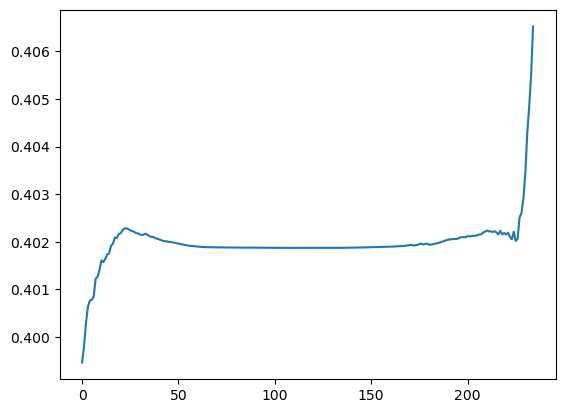

In [32]:
plt.plot(pred[0][:,pred_label])

In [6]:
train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)
pred = ig_model.predict(sup_array)
#print(sup_array[50])
#plt.plot(sup_array[140])
print(pred_label)

#plt.plot(pred[:,pred_label])
#plt.show()


8/8 [==============================] - 1s 88ms/step
1


15/15 [==============================] - 1s 97ms/step


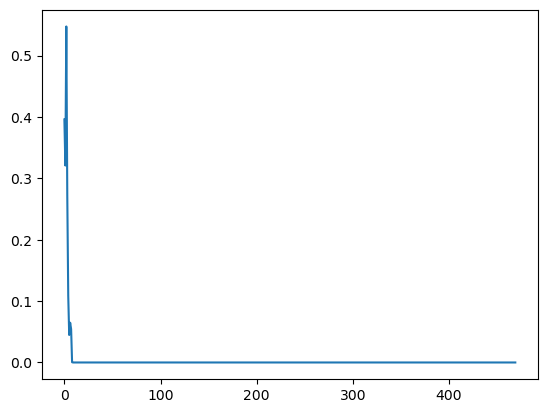

In [9]:

train_att = ig_data_stl[1] 
ts = 2
xvals = ig_data_stl[0][ts]
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
sorted_values = np.sort(xvals)[::-1]
baseline = np.zeros(470)
helper_array = []
for idx in range(0, len(sorted_vals), 1):
    baseline[idx] = sorted_vals[idx]
    helper_array.append(baseline.copy())


add_att = ig_model.predict(np.array(helper_array))[0][:,pred_label]
#[:,pred_label]

plt.plot(add_att)

In [ ]:
"""
supp_x_vals_pred = []
for xv, pa in zip(x,p[1]):
    pa = pa.flatten()
    supp_x  = xv.copy()
    sorted = replace#(np.argsort(pa)[::-1][int(len(pa)*keep):])
    supp_x[sorted] = 0 #supp_strat[sorted]
    supp_x_vals_pred.append(supp_x)
"""

# Run Prediction Flips

## For Experiment 1a: 


In [100]:
archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

model_type = "fcn"
model ="fcn"
dataset = "GunPoint"
experiment = "experiment_1"

from utils.utils import read_dataset
from utils.explanations import create_explanations, calculate_ig_attributions, calculate_shap_attributions
import numpy as np
from tensorflow import keras

def run_flipped_pred_test(dataset, itr):


    
    lerf_flipped_preds = []
    morf_flipped_preds = []

    results_lerf_acc = []
    results_morf_acc = []

    original_data = read_dataset(data_p, archive, dataset, 'original', 1)[dataset]
    x_train, y_train, x_test,y_test = original_data

    new_data =  y_test.flatten().copy()
    if dataset == 'ECG200':
        new_data[new_data==-1] = 0
        new_data[new_data==2] = 1
    else: 
        new_data -= 1
            
        
    ogd = new_data
    att_method = 'ig'

    #calcualte attributions
    if att_method == 'cam':
        attributions = calculate_cam_attributions(data_p, archive, f"{model}_{itr}", dataset, 'original',  experiment=1, scale='normalized')
    elif att_method == 'ig':
        attributions = calculate_ig_attributions(data_p, archive, f"{model}_{itr}", dataset, 'original',  experiment=1, scale='normalized')
    elif att_method == 'shap': 
        attributions = calculate_shap_attributions(data_p, archive, f"{model}_{itr}", dataset, 'original',  experiment=1, scale='normalized')
    ig_attributions = attributions

    ig_link  = f'./results/ucr/{dataset}/{experiment}/{model_type}/{model}_{itr}/original/best_model.hdf5'


    loaded_model = keras.models.load_model(ig_link ,compile=False)

    baseline_pred = np.argmax(loaded_model.predict(np.expand_dims(np.zeros(len(x_test[0])),0)))

    print("Baseline PRED", baseline_pred)

    original_pred = loaded_model.predict(x_test[np.where(ogd.flatten()!=baseline_pred)])

    # Check each iteration
    for delete_rate in np.arange(0,1.05,0.05): 
        explanations_lerf = []
        explanations_morf = []
        #Split data by train and test
        for a in range(2): 
            attr =  ig_attributions[a]
            sup_array_lerf = []
            sup_array_morf = []
            #delete percentile for each timeseries 
            for ts in range(len(attr)):
                #print(new_data[ts],baseline_pred, new_data[ts] == baseline_pred)
                if new_data[ts] == baseline_pred:continue

                #Lerf
                sorted_vals = np.argsort(attr[ts][2])
                #print(np.sort(attr[ts][2]))
                sorted_vals = sorted_vals[:int(len(attr[ts][2])*delete_rate)]
                sup_x  = attr[ts][1].copy()
                sup_x[sorted_vals] = 0 
                sup_array_lerf.append([attr[ts][0],attr[ts][1],sup_x])
                #Morf 
                sorted_vals = np.argsort(attr[ts][2])[::-1]
                #print(np.sort(attr[ts][2])[::-1])
                #print(sorted_vals)
                
                sorted_vals = sorted_vals[:int(len(attr[ts][2])*delete_rate)]
                sup_x  = attr[ts][1].copy()
                sup_x[sorted_vals] = 0 
                sup_array_morf.append([attr[ts][0],attr[ts][1],sup_x])

                # Indices of non-NaN values
                #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
                # Linearly interpolate NaN values
                #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            # Append transformed timeseries data
            explanations_lerf.append(sup_array_lerf)
            explanations_morf.append(sup_array_morf)
        #Get all transformed timeseries data for cycle // 1 indicates test data

        vals_lerf = [supr[2] for supr in explanations_lerf[1]]  
        vals_morf = [supr[2] for supr in explanations_morf[1]]  

        
        #lerf_acc = np.array([pr[np.argmax(opr)] for pr,opr in zip(loaded_model.predict(np.array(vals_lerf)),original_pred)]).flatten()
        #morf_acc = np.array([pr[np.argmax(opr)] for pr,opr in zip(loaded_model.predict(np.array(vals_morf)),original_pred)]).flatten()

        
        #results_lerf_acc.append(lerf_acc)
        #results_morf_acc.append(morf_acc)

        results_lerf = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals_lerf))]).flatten()
        results_morf = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals_morf))]).flatten()
        
        #print(ogd.flatten()[np.where(ogd.flatten()!=baseline_pred)],results_lerf)

        lerf_flipped_preds.append(list(ogd.flatten()[np.where(ogd.flatten()!=baseline_pred)]==results_lerf).count(False))
        morf_flipped_preds.append(list(ogd.flatten()[np.where(ogd.flatten()!=baseline_pred)]==results_morf).count(False))

    return lerf_flipped_preds, morf_flipped_preds, results_lerf_acc, results_morf_acc

In [88]:
np.arange(0,1.05,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_1/fcn/fcn_0/original/best_model.hdf5
1/1 [==============================] - 0s 153ms/step
Baseline PRED 0
3/3 [==============================] - 0s 8ms/step
0
1
3/3 [==============================] - 0s 8ms/step
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
3/3 [==============================] - 0s 10ms/step
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

ValueError: 'lightred' is not a valid value for color

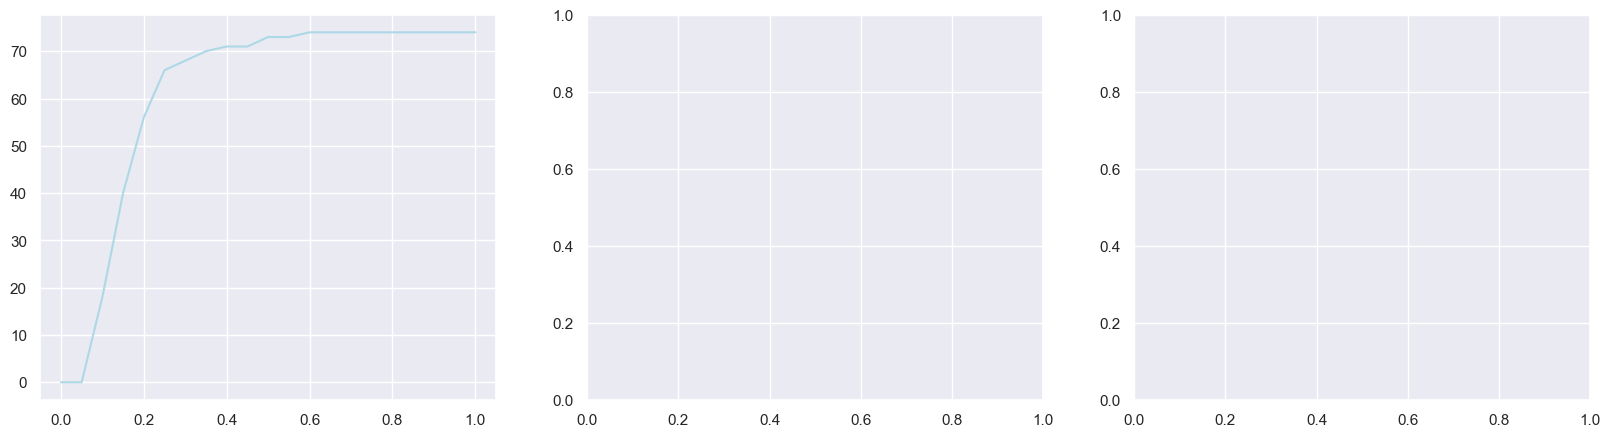

In [102]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for itr in range(5): 
    for idx, name in enumerate(["GunPoint","ECG200","Beef"]):
        lerf, morf, lacc, macc =  run_flipped_pred_test(name,itr)
        if itr == 1: 
            axes[idx].plot(np.arange(0,1.05,0.05),lerf, color = "blue") 
            axes[idx].plot(np.arange(0,1.05,0.05),morf, color = "red")
        else: 
            axes[idx].plot(np.arange(0,1.05,0.05),lerf, color = "lightblue") 
            axes[idx].plot(np.arange(0,1.05,0.05),morf, color = "lightcoral")
        axes[idx].set_title(name)
plt.show()
plt.draw()

In [ ]:
np.arange(0,1,0.05)

In [65]:
lerf, morf, lacc, macc, vals =  run_flipped_pred_test(name,itr)

G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_1/fcn/fcn_0/original/best_model.hdf5
3/3 [==============================] - 0s 10ms/step
0
1
74 74
3/3 [==============================] - 0s 10ms/step
0
1
74 74
3/3 [==============================] - 0s 6ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 6ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 6ms/step
0
1
74 74
3/3 [==============================] - 0s 6ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==============================] - 0s 8ms/step
0
1
74 74
3/3 [==========================

ValueError: not enough values to unpack (expected 5, got 4)

In [79]:
lerf, morf, lacc, macc, vals =  run_flipped_pred_test(name,itr)

G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_1/resnet/resnet_0/original/best_model.hdf5


KeyboardInterrupt: 

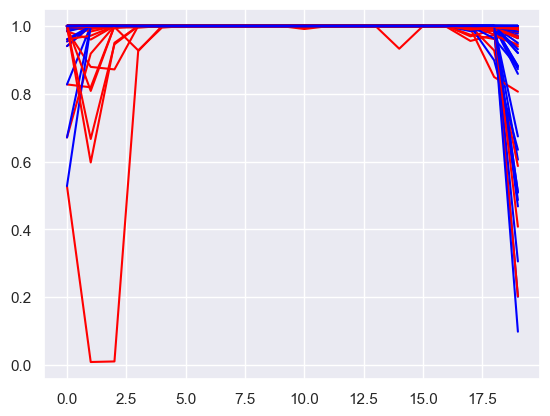

In [80]:
for i in range(len(macc[0])): 
    plt.plot(np.array(macc)[:,i],color="red")
    plt.plot(np.array(lacc)[:,i],color="blue")


In [29]:
np.where(np.array([0,1,2,1])!=1)

(array([0, 2], dtype=int64),)

In [111]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.titley`
        Vertical Axes location for the title (1.0 

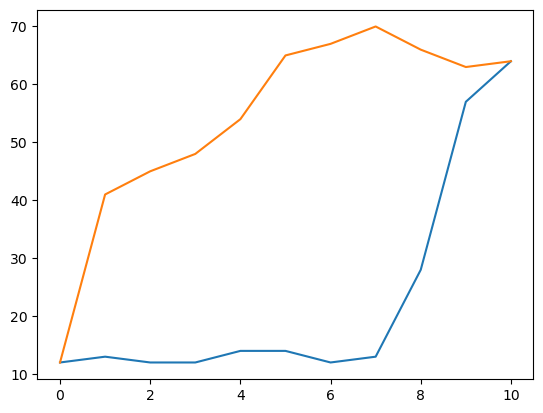

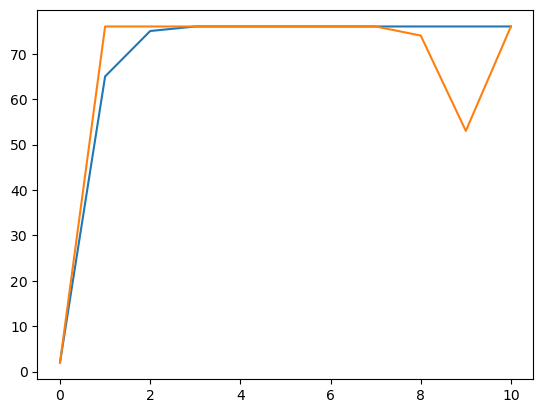

In [90]:
plt.plot(ig_flips_lerf)
plt.plot(ig_flips)

In [128]:
from utils.utils import read_dataset
from utils.explanations import calculate_ig_attributions
from  tensorflow import keras
import numpy as np

archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
model = "resnet_mt_nn_iter"
model_type = "resnet"
dataset = "GunPoint"
experiment = "experiment_4"

itr = 1
ig_flips = []
pred_flips = []
rand_flips = []
gamma = 0.5


original_data = read_dataset(data_p, archive, dataset, 'original', 1)[dataset]
x_train, y_train, x_test,y_test = original_data

new_data =  y_test.flatten().copy()
if dataset == 'ECG200':
    new_data[new_data==-1] = 0
    new_data[new_data==2] = 1
    print("new",new_data)
else: # GunPoint # ECG5000
    new_data -= 1

ogd = new_data



ig_attributions = calculate_ig_attributions(data_p, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_norm", task=1, experiment=4)
ig_link  = f'./results/ucr/{dataset}/{experiment}/{model_type}/{model}_{gamma}_{itr}/resnet_ig_norm/last_model.hdf5'
#f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/
#cam_model =keras.models.load_model(cam_link ,compile=False)
loaded_model = keras.models.load_model(ig_link ,compile=False)


for delete_rate in ([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0][::-1]): 
    print(delete_rate)
    explanations = []
    for a in range(2): 
        attr =  ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts][2])[::-1][:int(len(attr[ts][2])*delete_rate)]
            sup_x  = attr[ts][1].copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            #print(sup_x)
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([attr[ts][0],attr[ts][1],sup_x])
        explanations.append(sup_array)

    vals = [supr[2] for supr in explanations[1]]  

    results1 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    ig_flips.append(list(ogd.flatten()==results1).count(False))

    explanations = []
    for xval in [x_train,x_test]: 
        attr = loaded_model.predict(xval)[1] 
        #ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts].flatten())[::-1][:int(len(attr[ts].flatten())*delete_rate)]
            sup_x  = xval[ts].flatten().copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([0,0,sup_x])
        explanations.append(sup_array)


    vals = [supr[2] for supr in explanations[1]]  
    results2 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    pred_flips.append(list(ogd.flatten()==results2).count(False))


    explanations = []
    for xval in [x_train,x_test]: 
        attr = loaded_model.predict(xval)[1] 
        #ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts].flatten())[:int(len(attr[ts].flatten())*delete_rate)]
            sup_x  = xval[ts].flatten().copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([0,0,sup_x])
        explanations.append(sup_array)


    vals = [supr[2] for supr in explanations[1]]  
    results3 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    rand_flips.append(list(ogd.flatten()==results3).count(False))





G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_4/resnet/resnet_mt_nn_iter_0.5_1/resnet_ig_norm/best_model.hdf5
5/5 [==============================] - 0s 19ms/step
0
5/5 [==============================] - 0s 19ms/step
0.1
5/5 [==============================] - 0s 19ms/step
0.2
5/5 [==============================] - 0s 19ms/step
0.3
5/5 [==============================] - 0s 19ms/step
0.4
5/5 [==============================] - 0s 19ms/step
0.5
5/5 [==============================] - 0s 19ms/step
0.6
5/5 [==============================] - 0s 19ms/step
0.7
5/5 [==============================] - 0s 19ms/step
0.8
5/5 [==============================] - 0s 20ms/step
0.9
5/5 [==============================] - 0s 20ms/step
1
5/5 [==============================] - 0s 19ms/step


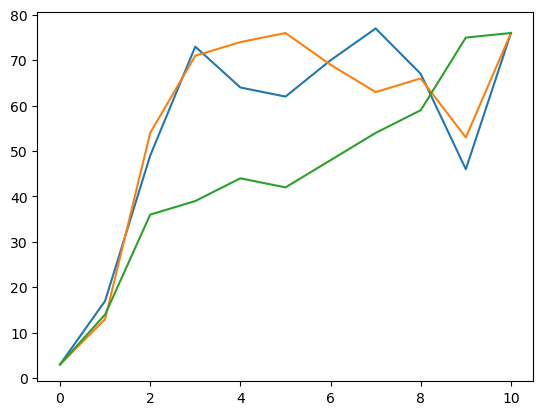

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)
plt.plot(rand_flips)

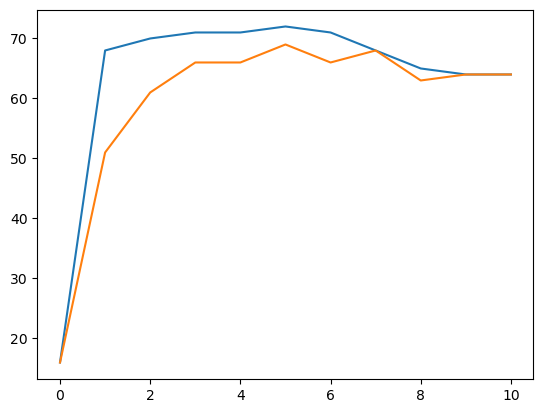

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

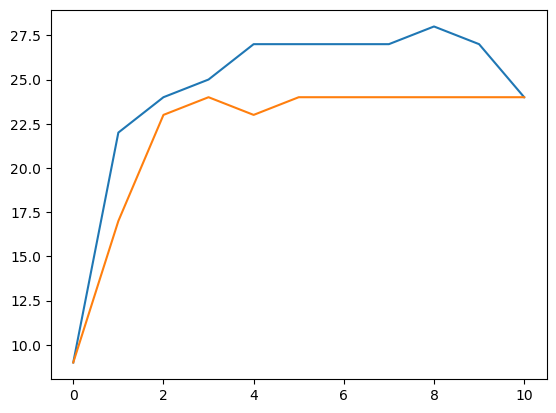

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

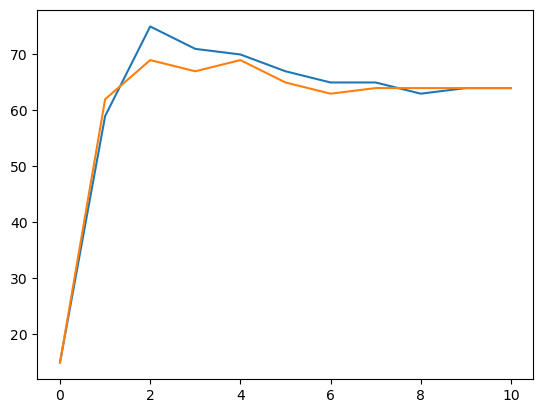

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

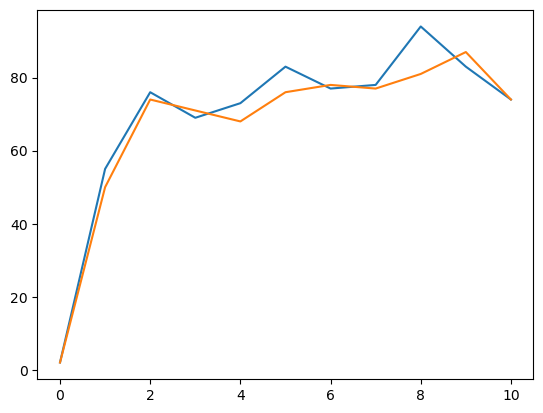

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

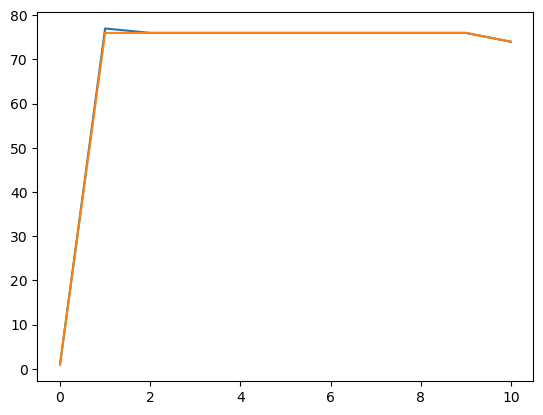

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

In [23]:
list(y_test.flatten()).count(1)

76

In [95]:

archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
model = "resnet_mt_nn_iter"
model_type = "resnet"
dataset = "GunPoint"
experiment = "experiment_4"
itr = 0
model = "resnet_mt_nn"
ig_link  = f'./results/ucr/{dataset}/{experiment}/{model_type}/{model}_iter_{gamma}_{itr}/resnet_ig_norm/last_model.hdf5'
#f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/
#cam_model =keras.models.load_model(cam_link ,compile=False)
loaded_model = keras.models.load_model(ig_link ,compile=False)

pred = loaded_model.predict(x_test)[1]

5/5 [==============================] - 0s 17ms/step


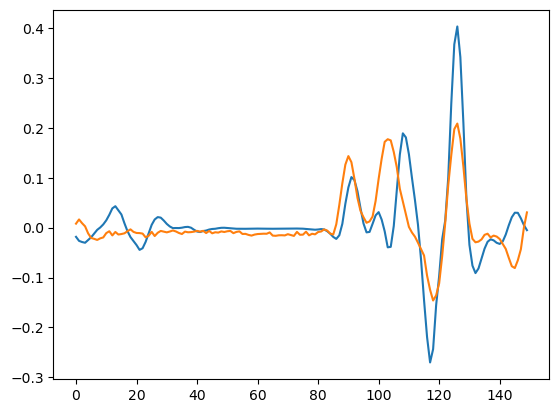

In [102]:
ts = 120
axt,ayt,axte,ayte = read_dataset(data_p, archive, dataset, 'resnet_ig_norm', 150)[dataset]
plt.plot(ayte[ts])
plt.plot(pred[ts])

In [48]:

np.readtxt("")

<module 'numpy' from 'c:\\Users\\boent\\anaconda3\\envs\\xai-tsc\\lib\\site-packages\\numpy\\__init__.py'>